# ASSIGNMENT #5 - UPPER AIR DATA #
Due: 08 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to first collect data from an online archive using a user-created function.  The data is then plotted on a map to continue to familiarize with plotting weather data on maps.  

Overview:\
In this assignment you will read in rawinsonde observations in a function and plot that data.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Carson Turner"
__contact__   = "carson.turner@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [1]:
import numpy as np
from datetime import datetime

from assignment_5_functions import get_raobs , select_press

import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import StationPlot
from metpy.interpolate import interpolate_to_grid, remove_nan_observations

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### DOWNLOAD OBSERVATIONS FROM  FILE ###
RAwinsonde OBservations (RAOBs) are available from the Iowa State Environmental Mesonet (IEM) archive.  This data can be accessed using the siphon module.  All this will be done within the assignment_5_functions file.  Note, RAOBs don't specify latitude/longitude so we need to add it using a metpy function -> *add_station_lat_lon(data)*.

In [2]:
#grab data from 00Z on 26 December 2023
dt = datetime(2023,12,26,0)
data = get_raobs(dt)


HTTPError: Error accessing http://mesonet.agron.iastate.edu/json/raob.py?ts=202312260000
Server Error (422: [{'type': 'missing', 'loc': ('query', 'station'), 'msg': 'Field required', 'input': {'ts': '202312260000'}, 'url': 'https://errors.pydantic.dev/2.7/v/missing'}])

### SUBSET TO 500MB OBS ###
We'll also do this within a function in the assignment_5_functions file.

In [13]:
data_500 = select_press(data,500)
print(data_500)


       pressure  height  temperature  dewpoint  direction  speed station  \
35        500.0  5630.0        -20.1     -52.1      280.0   16.0    CWPL   
177       500.0  5700.0        -20.1     -49.1      110.0    1.0    CWQI   
307       500.0  5620.0        -16.5     -24.5      325.0   25.0    CWSE   
451       500.0  5360.0        -20.9     -55.9      265.0  121.0    CYAH   
574       500.0  5340.0        -27.3     -30.8      315.0   49.0    CYBK   
...         ...     ...          ...       ...        ...    ...     ...   
14105     500.0  5850.0         -5.9     -11.9      250.0   27.0    KVER   
14169     500.0  5730.0        -16.3     -45.3      315.0   35.0    KWAL   
14291     500.0  5150.0        -26.1     -27.9      150.0   37.0    KYAK   
14451     500.0  5710.0        -15.5     -34.5      275.0   24.0    KYMW   
14573     500.0  5230.0        -24.7     -25.4      190.0   43.0    KYXY   

            time      u_wind     v_wind  latitude  longitude  
35    2023-12-26   15.75

### PLOT DATA MAP ###
Use the same map of CONUS as we did for the beginning of surface obs.<br>
No need to thin obs as there aren't a ton of RAOBs.

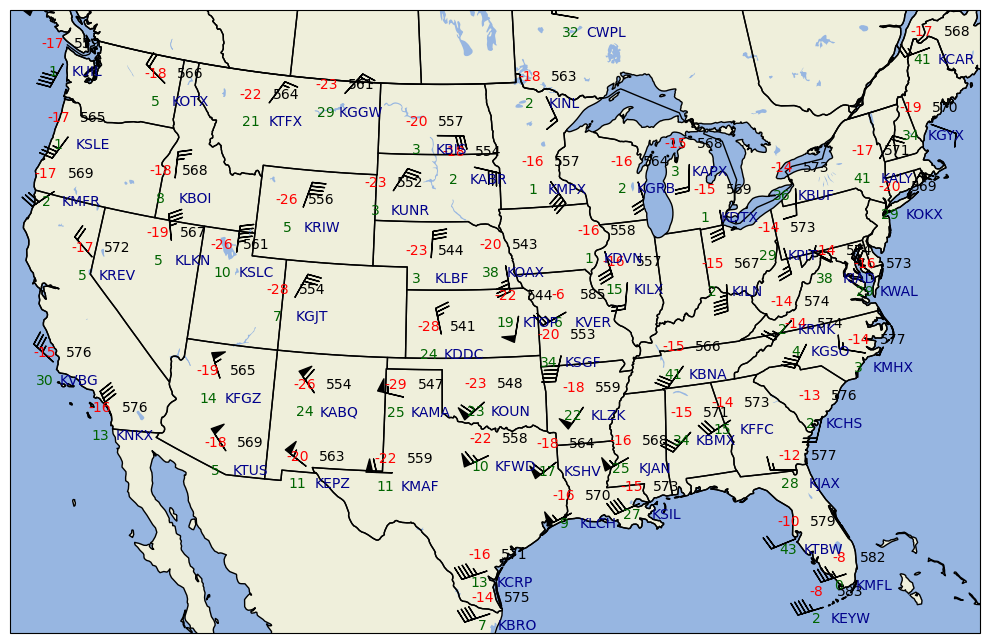

In [30]:
proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)

#create 10" x 10" figure with a dpi=100
fig = plt.figure(figsize = (10,10), dpi =100)
#add subplot with projection
ax = fig.add_subplot(1,1,1,projection=proj)

#add elements to make map more useable
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

#zoom on the CONUS
#lon_min = -120
#lon_max = -75
#lat_min = 23
#lat_max = 50
ax.set_extent((-120, -75, 23, 50))
ax.scatter(data.longitude, data.latitude, transform=ccrs.PlateCarree(), marker = "", zorder = 9)
fig.tight_layout()


plots = StationPlot (ax, data_500["longitude"], data_500["latitude"], transform = ccrs.PlateCarree(),clip_on = True)

#temperature in red
plots.plot_parameter ((-1,1), data_500["temperature"].values, color = 'red')
#dewpoint DEPRESSION in dark green
plots.plot_parameter ((-1,-1), data_500["temperature"] - data_500["dewpoint"].values, color = 'darkgreen')
#height (need to format to be the first 3 digits)
plots.plot_parameter((1.5,1), data_500["height"], color = 'black',formatter = lambda p: format (10*p, ".0f")[:3])
#station ID in dark blue
plots.plot_text ((1.5,-1), data_500["station"], color = 'darkblue')
#wind in black
plots.plot_barb (data_500["u_wind"].values, data_500["v_wind"].values)
#save the map as upper_air_500.png
plt.savefig("upper_air_500.png")

### CREATE 500mb HEIGHT CONTOURS (ISOHYPSES) ###

In [64]:
#convert the data to x, y, and z locations on the projected map

x,y,z = proj.transform_points(ccrs.PlateCarree(),data_500["longitude"].values, data_500["latitude"].values).T

#remove nans

mask = ~np.isnan(x)

#interpolate the data to a grid

grdx, grdy, hght = interpolate_to_grid(x[mask],y[mask],data_500["height"].values[mask], interp_type = "cressman", search_radius = 1000000,
                                       minimum_neighbors = 3, hres = 100000)


### PLOT UPPER AIR STATION PLOTS & CONTOURS ###

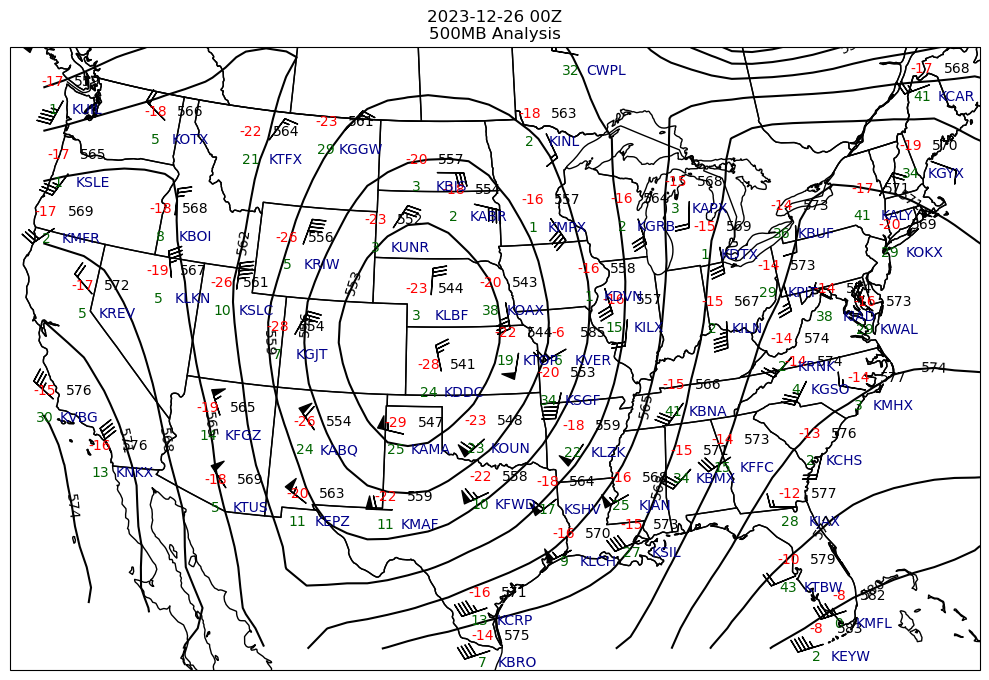

In [78]:

#temperature in red

#dewpoint DEPRESSION in dark green

#height (need to format to be the first 3 digits)

#station ID in dark blue

#wind in black


proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)

#create 10" x 10" figure with a dpi=100
fig = plt.figure(figsize = (10,10), dpi =100)
#add subplot with projection
ax = fig.add_subplot(1,1,1,projection=proj)

#add elements to make map more useable
#ax.add_feature(cfeature.LAND, color = "pink")
#ax.add_feature(cfeature.OCEAN, color = "red")
#ax.add_feature(cfeature.LAKES, color = "yellow")
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

#zoom on the CONUS
#lon_min = -120
#lon_max = -75
#lat_min = 23
#lat_max = 50
ax.set_extent((-120, -75, 23, 50))
ax.scatter(data.longitude, data.latitude, transform=ccrs.PlateCarree(), marker = "", zorder = 9)
fig.tight_layout()


plots = StationPlot (ax, data_500["longitude"], data_500["latitude"], transform = ccrs.PlateCarree(),clip_on = True)

#temperature in red
plots.plot_parameter ((-1,1), data_500["temperature"].values, color = 'red')
#dewpoint DEPRESSION in dark green
plots.plot_parameter ((-1,-1), data_500["temperature"] - data_500["dewpoint"].values, color = 'darkgreen')
#height (need to format to be the first 3 digits)
plots.plot_parameter((1.5,1), data_500["height"], color = 'black',formatter = lambda p: format (10*p, ".0f")[:3])
#station ID in dark blue
plots.plot_text ((1.5,-1), data_500["station"], color = 'darkblue')
#wind in black
plots.plot_barb (data_500["u_wind"].values, data_500["v_wind"].values)


#plot contours from 4600m to 6000m with 60m interval

clevs = np.arange(4600,6000, 30)
#print(clevs)
ds = ax.contour(grdx,grdy, hght,clevs, colors = "black")
ax.clabel(ds,inline = True,zorder = 10,fmt = lambda v: format(v,".0f")[:3])
#add a title with the date
plt.title(f'{dt.strftime("%Y-%m-%d %HZ")}\n500MB Analysis')

#save the map as contour_500.png
plt.savefig("contour_500.png")